## 1. Regression - Supervised Machine Learning

## 1.1 Business Problem - Regression

In this project, we have implemented Supervised Machine learning algorithm for Regression problem in the Hotel Industry.

**Problem Statement** : Predicting the Cost/Price of a Hotel Booking made by the Hotel Guest/Customer.


## 1.2 Data Collection

For this project, we have selected a data set containing hotel booking information that was uploaded to Kaggle, an online community of data scientists, by user Jesse Mostipak.

This dataset is available at Kaggle in the link: [Hotel Booking Demand Kaggle Dataset](https://www.kaggle.com/jessemostipak/hotel-booking-demand)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,6))
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

<Figure size 864x432 with 0 Axes>

## 1.3 Data Exploration

### 1.3.1 Understanding Data Set

In [2]:
df = pd.read_csv('hotel_bookings.csv')
pd.set_option('display.max_columns',None)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015


### 1.3.2 Shape of the dataset

In [3]:
df.shape

(119390, 32)

### 1.3.3 Checking Data Type of each Column

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### 1.3.4 Exploring Numerical Features

In [5]:
num_feature = [feature for feature in df.columns if df[feature].dtype != 'object']
print("Number of Numerical Features are : ",len(num_feature))

Number of Numerical Features are :  20


In [6]:
print(num_feature)

['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [7]:
df[num_feature][:3]

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,NaN,NaN,0,0.0,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,NaN,NaN,0,0.0,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,NaN,NaN,0,75.0,0,0


### 1.3.5 Exploring Categorical Features

In [8]:
cat_feature = [feature for feature in df.columns if df[feature].dtype == 'object']
print("Number of Categorical Features are : ",len(cat_feature))

Number of Categorical Features are :  12


In [9]:
print(cat_feature)

['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


In [10]:
df[cat_feature][:3]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,01/07/2015
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,01/07/2015
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,02/07/2015


### 1.3.6 Checking Missing Values (NaN) in Dataset 

In [11]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Checking % of Missing Values in the Data set

In [12]:
feature_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1]
for feature in feature_nan:
    print('{} : {} % Missing values'.format(feature,np.around(df[feature].isnull().mean(),4)))

children : 0.0 % Missing values
country : 0.0041 % Missing values
agent : 0.1369 % Missing values
company : 0.9431 % Missing values


### 1.3.7 Statistical Summary of the dataset - Descriptive Statistics

In [13]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### 1.3.8 Checking the Distribution of Cancellation Status (Target Variable)

In [14]:
df['is_canceled'].value_counts(normalize = True)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

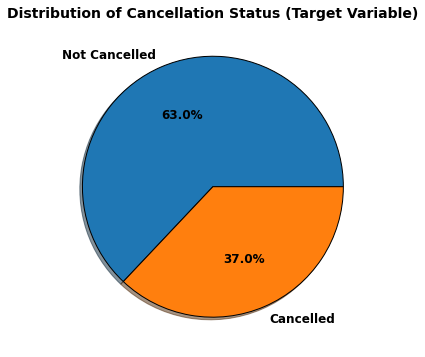

In [15]:
plt.figure(figsize=(12,6))
proportion = df['is_canceled'].value_counts()
labels = ['Not Cancelled','Cancelled']
plt.title('Distribution of Cancellation Status (Target Variable)',fontsize = 14, weight = 'bold')
plt.pie(proportion,labels=labels,shadow = True, autopct = '%1.1f%%',wedgeprops= {'edgecolor':'black'},textprops= { 'fontsize': 12,'weight' : 'bold'});

### 1.3.9 Skewness of the Attributes

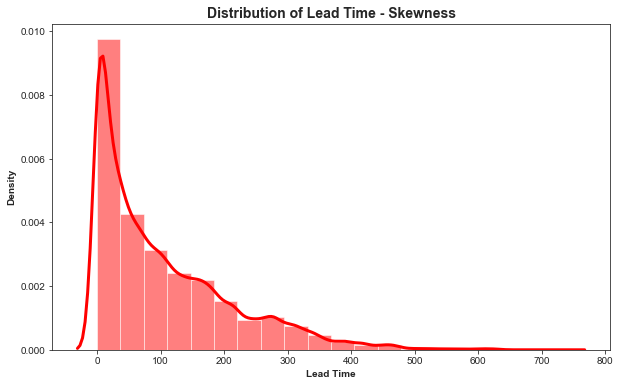

In [16]:
from scipy.stats import norm
plt.figure(figsize=(10,6))
sns.set_style('ticks')
ax = sns.distplot(df['lead_time'],bins = 20,color = 'r',kde_kws= {'lw': 3},hist_kws= {'alpha' : 0.5})
ax.set_title('Distribution of Lead Time - Skewness',fontsize = 14, weight='bold')
ax.set_xlabel("Lead Time",weight = 'bold')
ax.set_ylabel("Density",weight = 'bold');

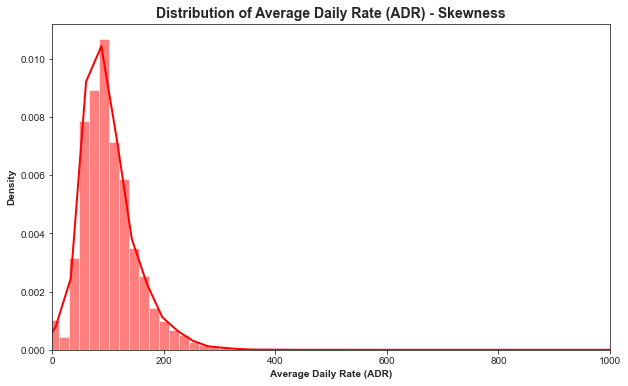

In [18]:
plt.figure(figsize=(10,6))
sns.set_style('ticks')
ax = sns.distplot(df['adr'],bins = 300,color = 'r',kde_kws= {'lw': 2},hist_kws= {'alpha' : 0.5})
ax.set_title('Distribution of Average Daily Rate (ADR) - Skewness',fontsize = 14, weight='bold')
ax.set_xlabel("Average Daily Rate (ADR)",weight = 'bold')
ax.set_ylabel("Density",weight = 'bold')
ax.set_xlim(0, 1000);

## 1.4 Data Preparation

### 1.4.1 Handling Missing Values

In [19]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [20]:
feature_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1]
for feature in feature_nan:
    print('{} : {}% Missing values'.format(feature,np.around(df[feature].isnull().mean(),4)))

children : 0.0% Missing values
country : 0.0041% Missing values
agent : 0.1369% Missing values
company : 0.9431% Missing values


From the above Analysis, it shows percentage of missing values in feature.


- "Company" feature has almost 94% missing values. Therefore, we do not have enough values to fill the rows or Impute the company column by mean, median etc. Hence we can drop the "Company" feature.
- "Agent" feature has 13.69% missing values. "Agent" feature is travel agency Id and these values are unique and we cannot impute Id by mean, median or mode. Since, missing values are 13% of all data we can't drop them. Therefore, missing data for "Agent" can be filled by 0.
-"Country" feature has 0.4% missing values. Since missing data of "Country" is less than 1%, we can will impute with most frequent value (Mode).
- "Children" feature has only 4 missing values and we can fill these missing values by 0 considering guests have no children.

In [21]:
#Dropping the "Company" feature
df.drop(columns = ['company'],inplace= True)

In [22]:
#Filling missing values by 0 for "Agent" feature
df['agent']= df['agent'].fillna(0)

In [23]:
#Imputing missing values of "Country" feature
df['country'].fillna(df['country'].mode()[0], inplace=True)

In [24]:
#Filling missing values by 0 for "Children" feature 
df['children']= df['children'].fillna(0)

All missing values in the data set are handled succcessfully

In [25]:
df1 = df.copy()

### 1.4.2 Feature Encoding (Encoding Categorical Variables)

In [26]:
cat_feature = [feature for feature in df1.columns if df1[feature].dtype == 'object']
print("Number of Categorical Features are : ",len(cat_feature))

Number of Categorical Features are :  12


In [27]:
print(cat_feature)

['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


In [28]:
df1[cat_feature][:3]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,01/07/2015
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,01/07/2015
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,02/07/2015


Let us check how many unique (Distinct) labels exists in each categorical features

In [29]:
for feature in cat_feature:
    print("{} : {} labels ".format(feature,len(df1[feature].unique())))

hotel : 2 labels 
arrival_date_month : 12 labels 
meal : 5 labels 
country : 177 labels 
market_segment : 8 labels 
distribution_channel : 5 labels 
reserved_room_type : 10 labels 
assigned_room_type : 12 labels 
deposit_type : 3 labels 
customer_type : 4 labels 
reservation_status : 3 labels 
reservation_status_date : 926 labels 


In [30]:
#Custom mapping
df1['hotel'] = df1['hotel'].map({'Resort Hotel':0, 'City Hotel':1})
df1['arrival_date_month'] = df1['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
                                                            'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [31]:
#Replacing "Undefined" with "SC" as mentioned in data set description
df1["meal"].replace("Undefined", "SC", inplace=True)

In [32]:
#Applying label encoding for categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1['meal'] = le.fit_transform(df1['meal'])
df1['deposit_type'] = le.fit_transform(df1['deposit_type'])
df1['customer_type'] = le.fit_transform(df1['customer_type'])
df1['market_segment'] = le.fit_transform(df1['market_segment'])
df1['distribution_channel'] = le.fit_transform(df1['distribution_channel'])
df1['reserved_room_type'] = le.fit_transform(df1['reserved_room_type'])
df1['assigned_room_type']= le.fit_transform(df1['assigned_room_type'])
df1['reservation_status'] = le.fit_transform(df1['reservation_status'])
df1['reservation_status_date'] = le.fit_transform(df1['reservation_status_date'])
df1['country'] = le.fit_transform(df1['country'])

## 1.5 Modeling - Regression

In [33]:
df1.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,0,342,2015,7,27,1,0,0,2,0.0,0,0,135,3,1,0,0,0,2,2,3,0,0.0,0,2,0.0,0,0,1,15
1,0,0,737,2015,7,27,1,0,0,2,0.0,0,0,135,3,1,0,0,0,2,2,4,0,0.0,0,2,0.0,0,0,1,15
2,0,0,7,2015,7,27,1,0,1,1,0.0,0,0,59,3,1,0,0,0,0,2,0,0,0.0,0,2,75.0,0,0,1,46


In [34]:
df1.shape

(119390, 31)

In [35]:
# Create a copy of the cleaned data set to use specifically for this regression problem
clean_data_reg = df1.copy()

In [36]:
clean_data_reg.corr()["adr"].sort_values(ascending = False)

adr                               1.000000
reserved_room_type                0.392060
children                          0.324853
assigned_room_type                0.258134
market_segment                    0.232763
adults                            0.230641
arrival_date_year                 0.197580
total_of_special_requests         0.172185
hotel                             0.096719
distribution_channel              0.092396
arrival_date_month                0.079315
arrival_date_week_number          0.075791
stays_in_week_nights              0.065237
meal                              0.062491
required_car_parking_spaces       0.056628
stays_in_weekend_nights           0.049342
is_canceled                       0.047557
arrival_date_day_of_month         0.030245
babies                            0.029186
booking_changes                   0.019618
agent                             0.016707
reservation_status_date           0.013156
days_in_waiting_list             -0.040756
reservation

In [37]:
# Drop "assigned_room_type", "booking_changes", "is_canceled", "reservation_status", and "reservation_status_date"
clean_data_reg.drop(['assigned_room_type', 'booking_changes', 'is_canceled', 'reservation_status',
                     'reservation_status_date'], axis = 1, inplace = True)

In [38]:
clean_data_reg.shape

(119390, 26)

In [39]:
clean_df_reg = clean_data_reg.copy()

In [40]:
from sklearn.model_selection import train_test_split

# target feature as "y" and the other features as "x"
x = clean_df_reg.drop('adr', axis=1)
y = clean_df_reg['adr']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state= 95)

In [41]:
#Import the scikit-learn functions and classes necessary to perform cross-validation
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

# Import the scikit-learn class used to train an Elastic-Net model
from sklearn.linear_model import ElasticNet

# Create a pipeline specifying all of the operations to perform when training the model
# In this case, the pipepline consists of z-score standardization and fitting of an Elastic-Net model
pipeline_en = make_pipeline(preprocessing.StandardScaler(), ElasticNet(fit_intercept = True))

# Specify the hyperparameters and their corresponding values that are to be used in GridSearch
hyperparameters_en = { 'elasticnet__alpha' : [0.1, 0.3, 0.5, 0.7, 0.9, 1],
                  'elasticnet__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1]}

# Initialize the GridSearch cross-validation object, specifying 10 folds for 10-fold cross-validation and
# "r2" and "neg_mean_squared_error" as the evaluation metrics for cross-validation scoring
elastic_net = GridSearchCV(pipeline_en, hyperparameters_en, cv = 10, scoring = ['r2', 'neg_mean_squared_error'],
                            refit = 'r2', verbose = 0, n_jobs = -1)

# Train and cross-validate the random forest regression model and ignore the function output
_ = elastic_net.fit(X_train, y_train)

In [42]:
print("Elastic Net Regression Accuracy Score (Train) :", elastic_net.score(X_train,y_train))
print("Elastic Net Regression Accuracy Score (Test) :",elastic_net.score(X_test,y_test))

Elastic Net Regression Accuracy Score (Train) : 0.3409358006477746
Elastic Net Regression Accuracy Score (Test) : 0.38314890722234496


In [43]:
# Import the scikit-learn class used to train a random forest regression model
from sklearn.ensemble import RandomForestRegressor

# Create a pipeline specifying all of the operations to perform when training the model
# In this case, the pipepline consists of z-score standardization and fitting of a random forest regressor
pipeline_rf = make_pipeline(preprocessing.StandardScaler(),
                            RandomForestRegressor(n_estimators=100, random_state = 42))

# Specify the hyperparameters and their corresponding values that are to be used in GridSearch
hyperparameters_rf = {'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                      'randomforestregressor__max_depth': [None, 5]}

# Initialize the GridSearch cross-validation object, specifying 10 folds for 10-fold cross-validation and
# "r2" and "neg_mean_squared_error" as the evaluation metrics for cross-validation scoring
random_forest = GridSearchCV(pipeline_rf, hyperparameters_rf, cv = 10, scoring = ['r2', 'neg_mean_squared_error'],
                            refit = 'r2', verbose = 0, n_jobs = -1)

# Train and cross-validate the random forest regression model and ignore the function output
_ = random_forest.fit(X_train, y_train)

In [44]:
print("Random Forest Regressor Accuracy Score (Train) :", random_forest.score(X_train,y_train))
print("Random Forest Regressor Accuracy Score (Test) :",random_forest.score(X_test,y_test))

Random Forest Regressor Accuracy Score (Train) : 0.9680667656456161
Random Forest Regressor Accuracy Score (Test) : 0.8915016143900129


In [45]:
# Import the scikit-learn functions used to calculate the R^2 and NMSE on the test set
from sklearn.metrics import r2_score, mean_squared_error

# Use the best Elastic-Net model to make predictions on the test set
y_test_pred_en = elastic_net.predict(X_test)

# Display the R^2 and NMSE on the train and test sets for the Elastic-Net model
print('Elastic-Net R^2 (train):', round(elastic_net.cv_results_['mean_test_r2'][elastic_net.best_index_], 3))
print('Elastic-Net R^2 (test):', round(r2_score(y_test, y_test_pred_en), 3), '\n')
print('Elastic-Net NMSE (train):', round(elastic_net.cv_results_['mean_test_neg_mean_squared_error'][elastic_net.best_index_], 3))
print('Elastic-Net NMSE (test):', round(mean_squared_error(y_test, y_test_pred_en) * -1, 3), '\n')

# Use the best random forest model to make predictions on the test set
y_test_pred_rf = random_forest.predict(X_test)

# Display the R^2 and NMSE on the train and test sets for the random forest model
print('Random forest R^2 (train):', round(random_forest.cv_results_['mean_test_r2'][random_forest.best_index_], 3))
print('Random forest R^2 (test):', round(r2_score(y_test, y_test_pred_rf), 3), '\n')
print('Random forest NMSE (train):', round(random_forest.cv_results_['mean_test_neg_mean_squared_error'][random_forest.best_index_], 3))
print('Random forest NMSE (test):', round(mean_squared_error(y_test, y_test_pred_rf) * -1, 3))

Elastic-Net R^2 (train): 0.364
Elastic-Net R^2 (test): 0.383 

Elastic-Net NMSE (train): -1739.455
Elastic-Net NMSE (test): -1422.991 

Random forest R^2 (train): 0.835
Random forest R^2 (test): 0.892 

Random forest NMSE (train): -579.177
Random forest NMSE (test): -250.291


In [46]:
from xgboost.sklearn import XGBRegressor

xgb_reg = XGBRegressor(objective = 'reg:squarederror',random_state= 42)
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [47]:
xgb_reg.score(X_train,y_train)

0.9027583519749954

In [48]:
xgb_reg.score(X_test,y_test)

0.8844623096197612

In [49]:
xgb1 = XGBRegressor()
parameters = {
              'objective':['reg:linear','reg:squarederror'],
              'learning_rate': [.03, .05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [100,200]}

xgb_grid = GridSearchCV(xgb1,parameters,cv = 10, n_jobs = -1, verbose=True)

In [50]:
xgb_grid.fit(X_train,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[16:38:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_ca...
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                               

In [51]:
print("XGBOOST Regressor Accuracy Score (Train) :", xgb_grid.score(X_train,y_train))
print("XGBOOST Regressor Accuracy Score (Test) :",xgb_grid.score(X_test,y_test))

XGBOOST Regressor Accuracy Score (Train) : 0.8598538421514764
XGBOOST Regressor Accuracy Score (Test) : 0.8877181739916994


In [52]:
print('XGBOOST Regressor Best score: {} using best parameters {}'.format(xgb_grid.best_score_, xgb_grid.best_params_))

XGBOOST Regressor Best score: 0.8332961790548472 using best parameters {'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 200, 'objective': 'reg:linear', 'subsample': 0.7}
